# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [280]:
df = pd.read_csv('../data/am_pm.csv')
df.head()

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day


In [281]:
""" КОД ИЗ ЗАДАНИЯ EX00 """

X = df[['am', 'pm']]
y = df['target']
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X, y)
y_pred = model.predict(X)

In [282]:
def plot_decision_boundary(
  model: LogisticRegression, 
  df: pd.DataFrame, 
  X: pd.DataFrame | np.ndarray,
  hue_col: str,
  figsize: tuple[int, int] = (15, 8),
  title: str = 'Decision boundary for logistic regression',
  grid_resolution: int = 100,
  alpha: float = 0.5,
  point_size: int = 50,
  style: str = 'darkgrid',
  response_method: str = 'predict',
  is_scaled: bool = False,
  scaler = None
) -> None:
  """
  Plot decision boundary for a classifier with scatter plot of data points.
  """

  sns.set_style(style)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)


  # Determine x and y features based on whether data is scaled
  if is_scaled and scaler is not None:
    scaled_features = scaler.transform(df[['am', 'pm']])
    plot_df = df.copy()
    plot_df['x'] = scaled_features[:, 0]
    plot_df['y'] = scaled_features[:, 1]
    x_label, y_label = 'am (scaled)', 'pm (scaled)'
  else:
    plot_df = df.copy()
    plot_df['x'] = df['am']
    plot_df['y'] = df['pm']
    x_label, y_label = 'am', 'pm'

  plot_settings = [
    {'hue_col': 'target', 'title': 'True Values', 'ax': ax1},
    {'hue_col': hue_col, 'title': 'Predicted Values', 'ax': ax2},
  ]

  for settings in plot_settings:
    DecisionBoundaryDisplay.from_estimator(
      estimator=model,
      X=X,
      response_method=response_method,
      alpha=alpha,
      grid_resolution=grid_resolution,
      ax=settings['ax']
    )

    sns.scatterplot(
      data=plot_df,
      x='x',
      y='y',
      hue=settings['hue_col'],
      palette='Set1',
      edgecolor='k',
      s=point_size,
      ax=settings['ax'],
    )
    
    settings['ax'].set_xlabel(x_label)
    settings['ax'].set_ylabel(y_label)
    settings['ax'].set_title(f'{title}\n{settings["title"]}', fontsize=12)
    
  plt.tight_layout()
  plt.show()

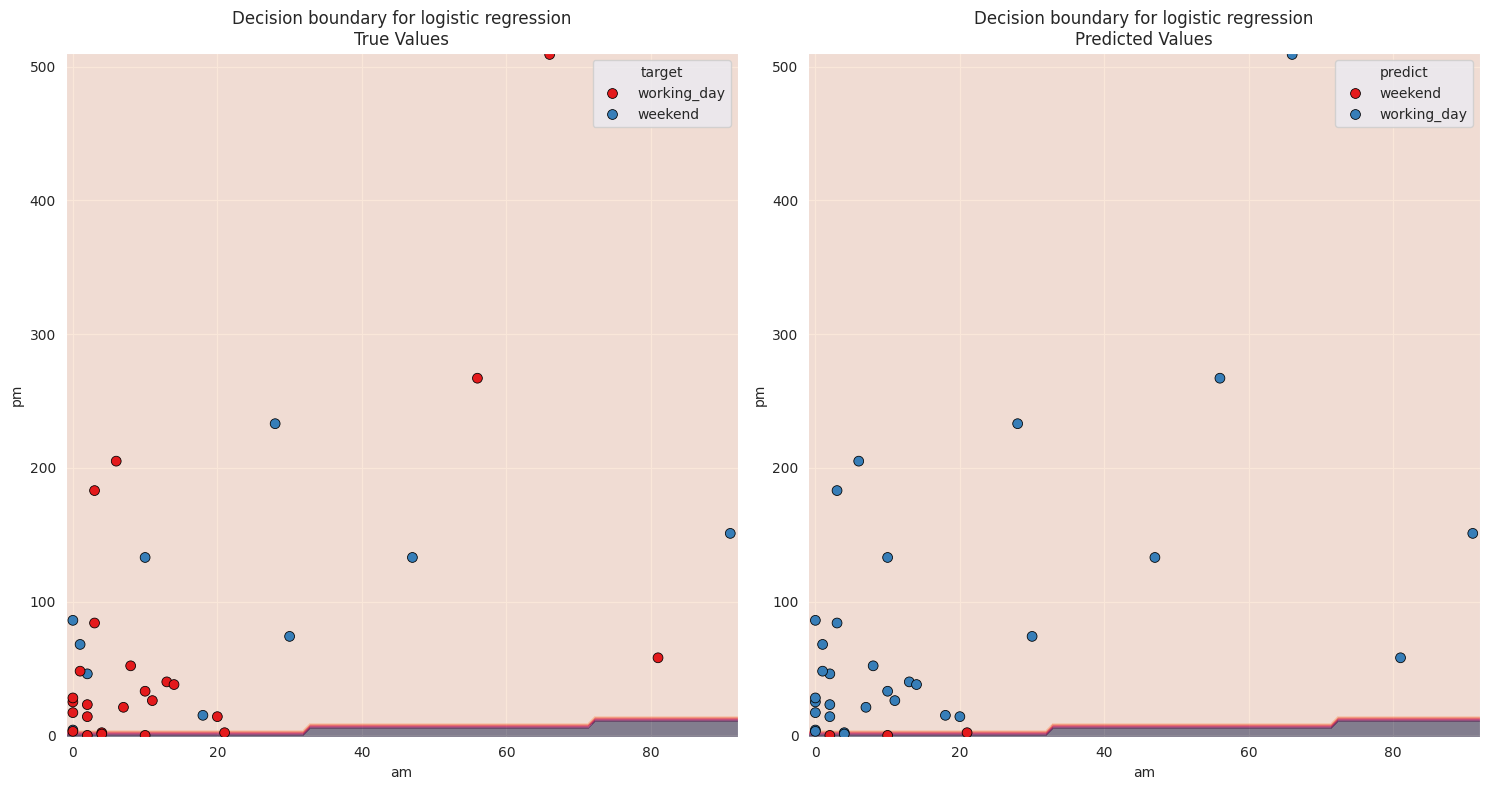

In [283]:
plot_decision_boundary(
  model,
  df,
  X,
  'predict',
)

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [284]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[0:10])

[[ 0.20069005 -0.71990365]
 [-0.65591383 -0.07182203]
 [ 0.07219947 -0.59225121]
 [-0.61308363 -0.51369586]
 [-0.69874402 -0.49405703]
 [-0.69874402 -0.46459877]
 [-0.27044208 -0.41550168]
 [-0.61308363 -0.60207063]
 [ 0.5861618  -0.01290552]
 [ 0.50050141  1.54838202]]


In [285]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)

df['scaled_predict'] = y_pred
df

,date,am,pm,target,predict,scaled_predict
0,2020-04-17,21,2,working_day,weekend,working_day
1,2020-04-18,1,68,weekend,working_day,working_day
2,2020-04-19,18,15,weekend,working_day,working_day
3,2020-04-20,2,23,working_day,working_day,working_day
4,2020-04-21,0,25,working_day,working_day,working_day
5,2020-04-22,0,28,working_day,working_day,working_day
6,2020-04-23,10,33,working_day,working_day,working_day
7,2020-04-24,2,14,working_day,working_day,working_day
8,2020-04-25,30,74,weekend,working_day,weekend
9,2020-04-26,28,233,weekend,working_day,weekend


In [286]:
accuracy = accuracy_score(y, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7428571428571429


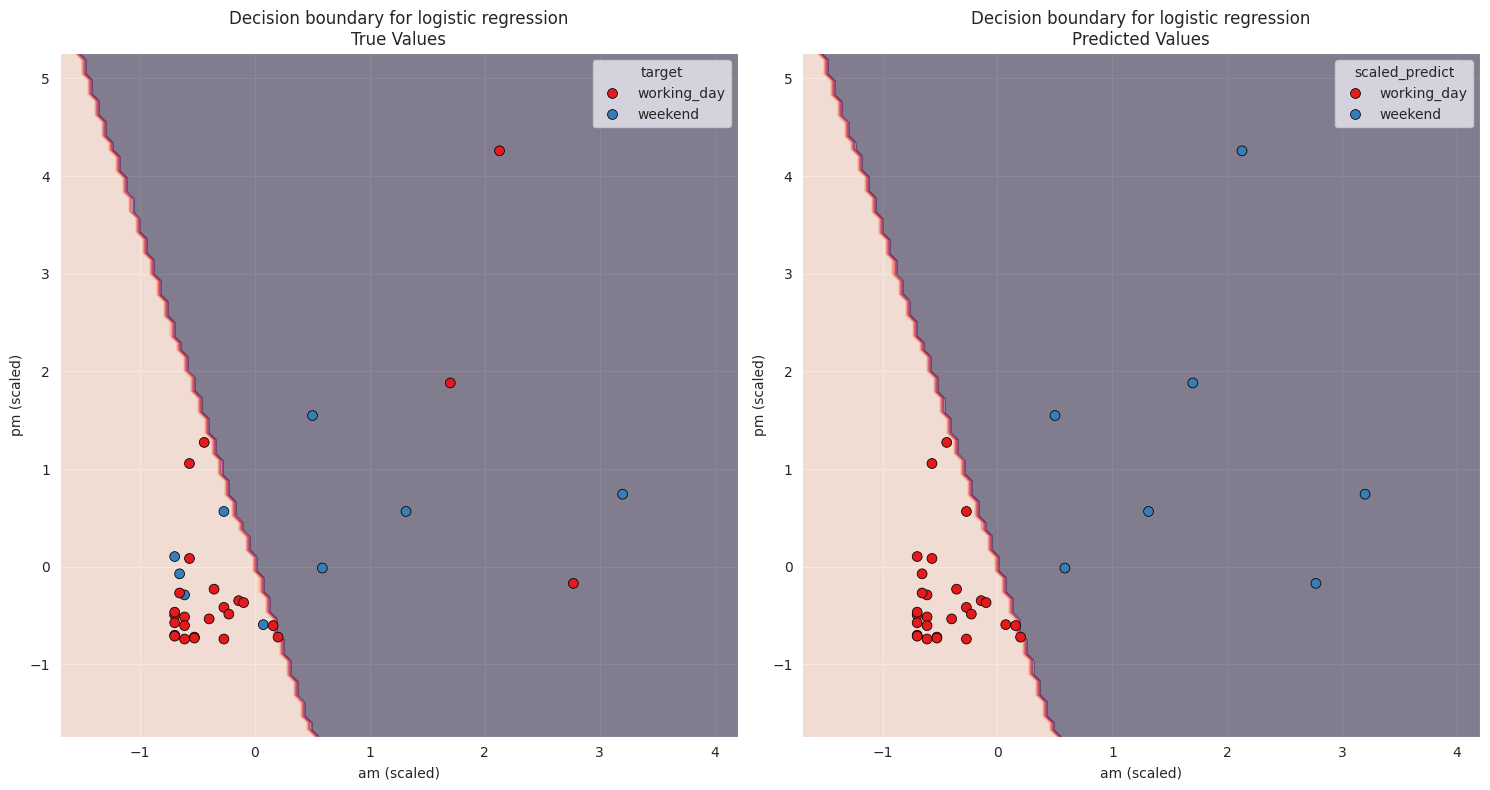

In [287]:
plot_decision_boundary(
  model,
  df,
  X_scaled,
  'scaled_predict',
  is_scaled=True,
  scaler=scaler,
)

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [288]:
svm_model = SVC(probability=True, random_state=21, kernel='rbf')
svm_model.fit(X_scaled, y)

y_pred = svm_model.predict(X_scaled)

df['svm_predict'] = y_pred
df

,date,am,pm,target,predict,scaled_predict,svm_predict
0,2020-04-17,21,2,working_day,weekend,working_day,working_day
1,2020-04-18,1,68,weekend,working_day,working_day,working_day
2,2020-04-19,18,15,weekend,working_day,working_day,working_day
3,2020-04-20,2,23,working_day,working_day,working_day,working_day
4,2020-04-21,0,25,working_day,working_day,working_day,working_day
5,2020-04-22,0,28,working_day,working_day,working_day,working_day
6,2020-04-23,10,33,working_day,working_day,working_day,working_day
7,2020-04-24,2,14,working_day,working_day,working_day,working_day
8,2020-04-25,30,74,weekend,working_day,weekend,working_day
9,2020-04-26,28,233,weekend,working_day,weekend,working_day


In [289]:
smv_accuracy = accuracy_score(y, y_pred)
print(f'SVM Accuracy: {smv_accuracy}')

SVM Accuracy: 0.7428571428571429


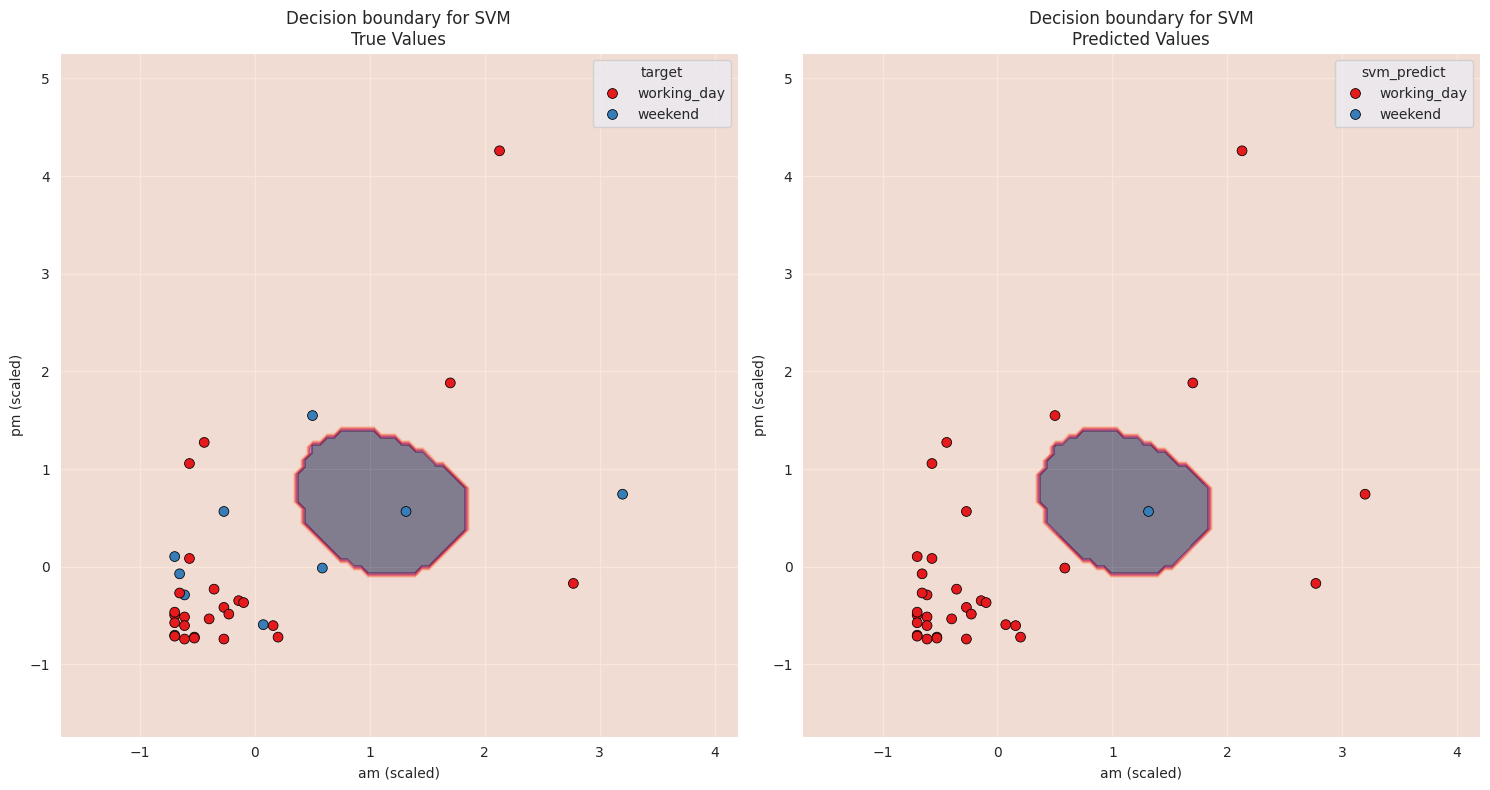

In [290]:
plot_decision_boundary(
  svm_model,
  df,
  X_scaled,
  'svm_predict',
  title='Decision boundary for SVM',
  is_scaled=True,
  scaler=scaler
)

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [291]:
decision_tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree_model.fit(X_scaled, y)

y_pred = decision_tree_model.predict(X_scaled)

df['tree_predict'] = y_pred
df

,date,am,pm,target,predict,scaled_predict,svm_predict,tree_predict
0,2020-04-17,21,2,working_day,weekend,working_day,working_day,working_day
1,2020-04-18,1,68,weekend,working_day,working_day,working_day,weekend
2,2020-04-19,18,15,weekend,working_day,working_day,working_day,working_day
3,2020-04-20,2,23,working_day,working_day,working_day,working_day,working_day
4,2020-04-21,0,25,working_day,working_day,working_day,working_day,working_day
5,2020-04-22,0,28,working_day,working_day,working_day,working_day,working_day
6,2020-04-23,10,33,working_day,working_day,working_day,working_day,working_day
7,2020-04-24,2,14,working_day,working_day,working_day,working_day,working_day
8,2020-04-25,30,74,weekend,working_day,weekend,working_day,weekend
9,2020-04-26,28,233,weekend,working_day,weekend,working_day,weekend


In [292]:
tree_accuracy = accuracy_score(y, y_pred)
print(f'Decision Tree Accuracy: {tree_accuracy}')

Decision Tree Accuracy: 0.9428571428571428


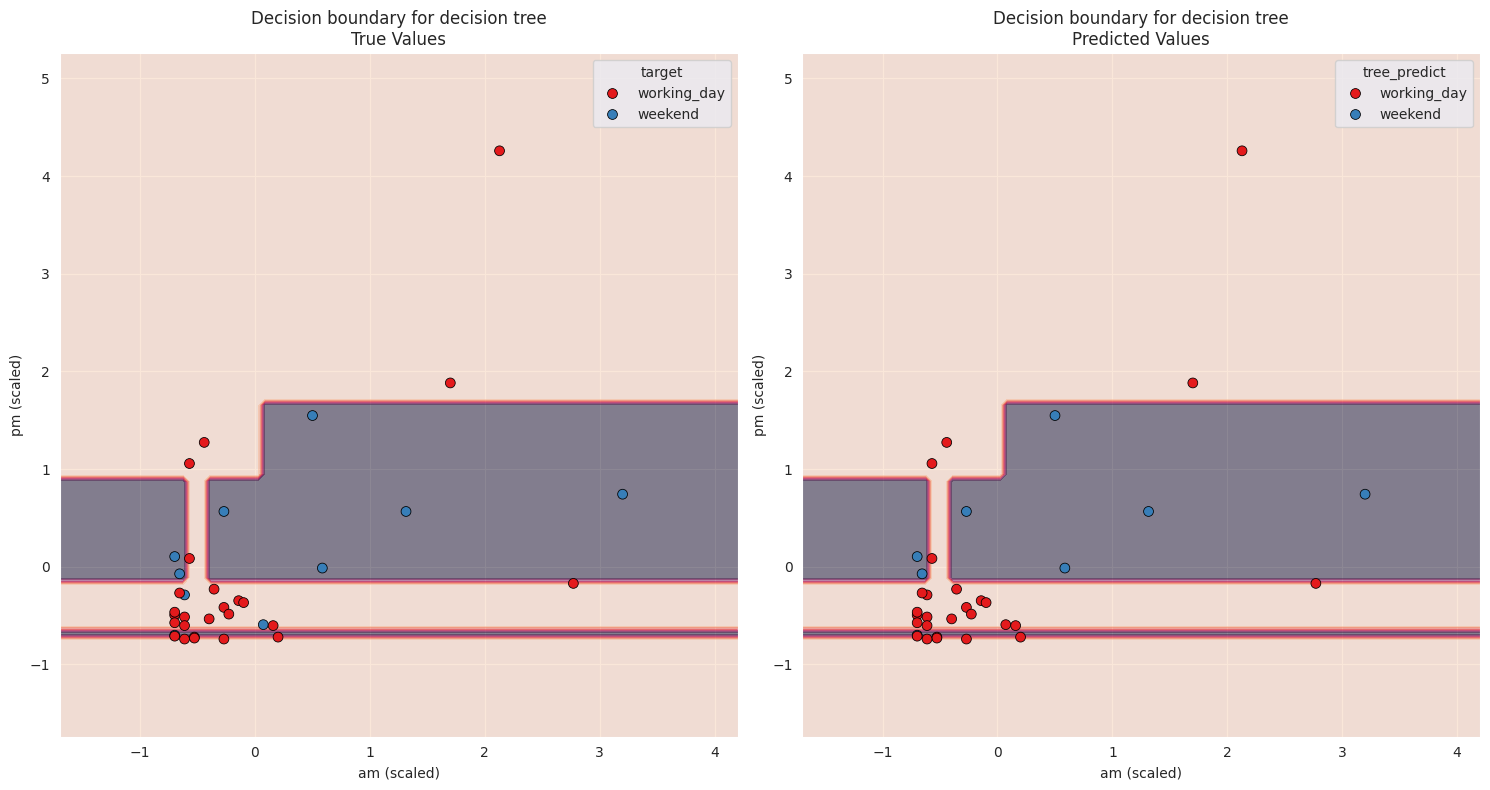

In [293]:
plot_decision_boundary(
  model=decision_tree_model,
  df=df,
  X=X_scaled,
  hue_col='tree_predict',
  title='Decision boundary for decision tree',
  is_scaled=True,
  scaler=scaler
)

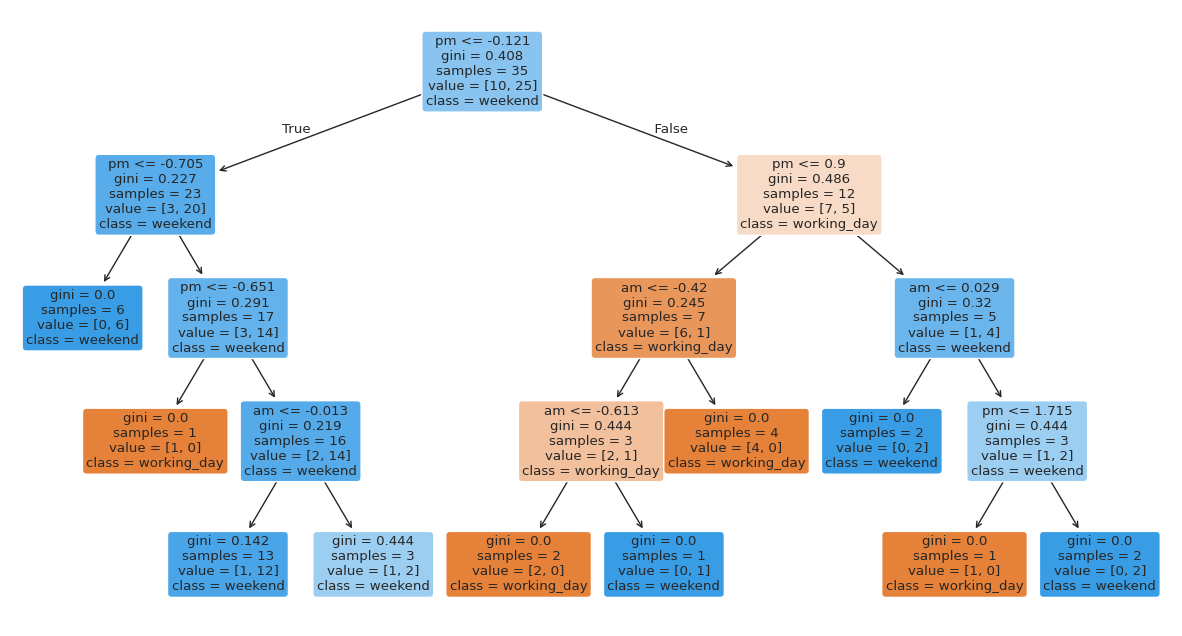

In [294]:
plt.figure(figsize=(15,8))
plot_tree(
  decision_tree=decision_tree_model,
  feature_names=['am', 'pm'],
  class_names=['working_day', 'weekend'],
  filled=True,
  rounded=True
)
plt.show()

4 leaves are labeled as working days in the vizualized tree